In [1]:
import tensorflow as tf
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from datetime import datetime
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import OrthogonalMatchingPursuit, orthogonal_mp
from math import sqrt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import OrthogonalMatchingPursuit, OrthogonalMatchingPursuitCV
from catboost import CatBoostRegressor
from sklearn.svm import SVR
import warnings
warnings.filterwarnings('ignore')

2022-01-06 09:37:09.403740: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
/usr/lib/python3/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.7) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)
Using TensorFlow backend.


In [4]:
path = 'Derivatives_new/'
x1_train = pd.read_csv(path+'c_comb_x1_train.csv')
x2_train = pd.read_csv(path+'c_comb_x2_train.csv')
x1_test = pd.read_csv(path+'c_comb_x1_test.csv')
x2_test = pd.read_csv(path+'c_comb_x2_test.csv')

v1_train = pd.read_csv(path+'c_comb_vel_x1_train.csv')
v2_train = pd.read_csv(path+'c_comb_vel_x2_train.csv')
v1_test = pd.read_csv(path+'c_comb_vel_x1_test.csv')
v2_test = pd.read_csv(path+'c_comb_vel_x2_test.csv')

fv1_train = pd.read_csv(path+'c_comb_Filvel_x1_train.csv')
fv2_train = pd.read_csv(path+'c_comb_Filvel_x2_train.csv')
fv1_test = pd.read_csv(path+'c_comb_Filvel_x1_test.csv')
fv2_test = pd.read_csv(path+'c_comb_Filvel_x2_test.csv')

y_train = pd.read_csv(path+'c_comb_f1_train.csv')
y_test = pd.read_csv(path+'c_comb_f1_test.csv')

X_train = pd.DataFrame(data = np.concatenate((x1_train,x2_train,v1_train,v2_train,fv1_train,fv2_train),axis=1))
X_test = pd.DataFrame(data = np.concatenate((x1_test,x2_test,v1_test,v2_test,fv1_test, fv2_test),axis=1))
X_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.0000,-0.0000,0.0000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,-0.0159,-0.0000,-0.0159,0.0000,-0.000601,-0.001160,-0.001683,-0.002174,0.000000,0.000000,0.000000,0.000000
2,-0.0159,0.0171,0.0000,0.0171,-0.001157,-0.002151,-0.003009,-0.003753,0.000646,0.001248,0.001810,0.002338
3,-0.0159,0.0171,0.0000,0.0000,-0.001069,-0.001837,-0.002372,-0.002727,0.001244,0.002313,0.003236,0.004037
4,-0.0000,0.0329,0.0159,0.0158,-0.000387,-0.000409,-0.000187,0.000193,0.001747,0.003128,0.004223,0.005093


In [5]:
x_train,x_test = np.array(X_train),np.array(X_test)

In [6]:
cat = CatBoostRegressor()
t1 = datetime.now()
cat.fit(x_train,y_train)
t2 = datetime.now()

Learning rate set to 0.086822
0:	learn: 0.9227900	total: 69.3ms	remaining: 1m 9s
1:	learn: 0.8466524	total: 79.7ms	remaining: 39.8s
2:	learn: 0.7783734	total: 85.8ms	remaining: 28.5s
3:	learn: 0.7148457	total: 92ms	remaining: 22.9s
4:	learn: 0.6568693	total: 97.2ms	remaining: 19.3s
5:	learn: 0.6040253	total: 102ms	remaining: 16.9s
6:	learn: 0.5561164	total: 107ms	remaining: 15.2s
7:	learn: 0.5121611	total: 112ms	remaining: 13.9s
8:	learn: 0.4713261	total: 118ms	remaining: 13s
9:	learn: 0.4345097	total: 123ms	remaining: 12.2s
10:	learn: 0.4003368	total: 128ms	remaining: 11.5s
11:	learn: 0.3691217	total: 133ms	remaining: 10.9s
12:	learn: 0.3403984	total: 142ms	remaining: 10.8s
13:	learn: 0.3144043	total: 147ms	remaining: 10.4s
14:	learn: 0.2913328	total: 153ms	remaining: 10s
15:	learn: 0.2704354	total: 158ms	remaining: 9.69s
16:	learn: 0.2506086	total: 164ms	remaining: 9.47s
17:	learn: 0.2320023	total: 169ms	remaining: 9.23s
18:	learn: 0.2152635	total: 175ms	remaining: 9.02s
19:	learn: 0

In [7]:
print('Time taken by Cat Boosting:',t2-t1)

y_pred = cat.predict(x_test)
print('Root mean square error of Cat Boost Model: ',sqrt(mean_squared_error(y_test,y_pred)))

Time taken by Cat Boosting: 0:00:05.495850
Root mean square error of Cat Boost Model:  0.04314969900696951


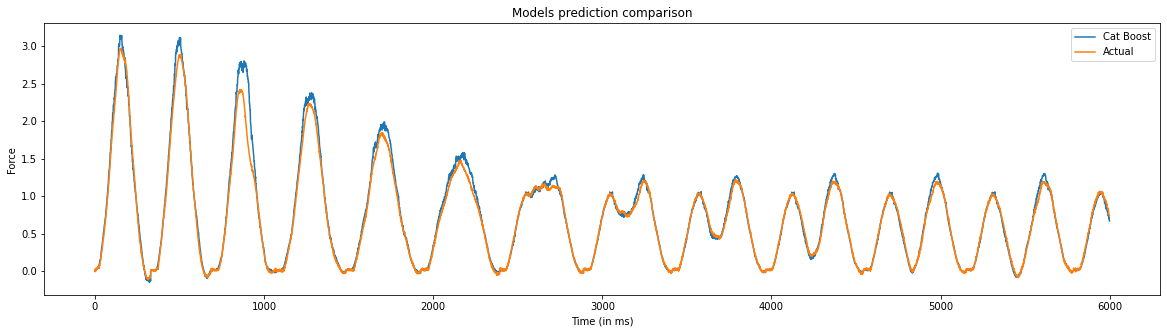

In [8]:
plt.figure(figsize=(20,5))
plt.plot(list(range(6000)),y_pred[:6000], label = 'Cat Boost')
plt.plot(list(range(6000)),y_test[:6000], label = 'Actual')
plt.legend()
plt.xlabel('Time (in ms)')
plt.ylabel('Force')
plt.title('Models prediction comparison')
plt.show()



Time taken by RBF Model:  0:01:52.633701
Root mean square error of RBF Model:  0.05134465154775188
Minimum Error = [6.18758838e-07]
Maximum Error = [0.73985648]
Median Value of Error = [0.02028094]


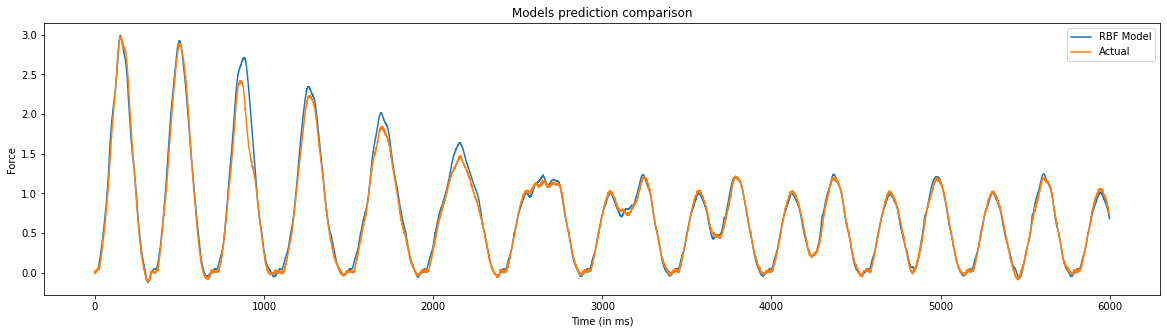

In [10]:
from scipy import *
from scipy.linalg import norm, pinv
import math

from matplotlib import pyplot as plt
 
class RBF:
     
    def __init__(self, indim, numCenters, outdim):
        self.indim = indim
        self.outdim = outdim
        self.numCenters = numCenters
        self.centers = [np.random.uniform(-1, 1, indim) for i in range(numCenters)]
        self.beta = 8
        self.W = np.random.random((self.numCenters, self.outdim))
         
    def _basisfunc(self, c, d):
        assert len(d) == self.indim
        return norm(c-d)**3
     
    def _calcAct(self, X):
        # calculate activations of RBFs
        G = np.zeros((X.shape[0], self.numCenters), float)
        for ci, c in enumerate(self.centers):
            for xi, x in enumerate(X):
                G[xi,ci] = self._basisfunc(c, x)
        return G
     
    def train(self, X, Y):
        """ X: matrix of dimensions n x indim 
            y: column vector of dimension n x 1 """
         
        # choose random center vectors from training set
        rnd_idx = np.random.permutation(X.shape[0])[:self.numCenters]
        self.centers = [X[i,:] for i in rnd_idx]
         
        #print("center", self.centers)
        # calculate activations of RBFs
        G = self._calcAct(X)
        #print(G)
         
        # calculate output weights (pseudoinverse)
        self.W = np.dot(pinv(G), Y)
         
    def test(self, X):
        """ X: matrix of dimensions n x indim """
         
        G = self._calcAct(X)
        Y = np.dot(G, self.W)
        return Y

# RBF MODEL with k = 100
rbf = RBF(12, 100, 1)
t1 = datetime.now()
rbf.train(x_train, y_train)
t2 = datetime.now()
    
print('\n\nTime taken by RBF Model: ',t2-t1)
y1_pred = rbf.test(x_test)
y2 = y1_pred
print('Root mean square error of RBF Model: ',sqrt(mean_squared_error(y_test,y1_pred)))
    
error5 = []
for i in range(len(y_test)):
    error5.append(abs(y1_pred[i]-y_test.iloc[i,0]))
print('Minimum Error =',min(error5))
print('Maximum Error =',max(error5))
error6 = sorted(error5)
print('Median Value of Error =',error6[len(error5)//2])
    
plt.figure(figsize=(20,5))
plt.plot(list(range(6000)),y2[:6000], label = 'RBF Model')
plt.plot(list(range(6000)),y_test[:6000], label = 'Actual')
plt.legend()
plt.xlabel('Time (in ms)')
plt.ylabel('Force')
plt.title('Models prediction comparison')
plt.show()

Time taken by Random Forest 0:02:18.724404
Root Mean Squared error of Random Forest 0.0651633530225573
Minimum Error = 1.734723475976807e-18
Maximum Error = 1.0188929999999998
Median Value of Error = 0.019597999999999782


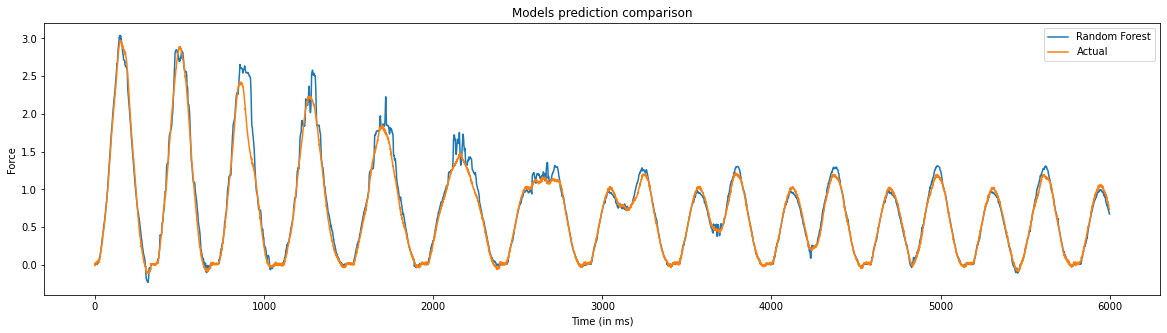

In [11]:
if __name__ == '__main__':
    t1 = datetime.now()
    rf = RandomForestRegressor()
    rf.fit(x_train,y_train)
    t2 = datetime.now()
    print('Time taken by Random Forest',t2-t1)
    
    y1_pred = rf.predict(x_test)
    y1 = y1_pred
    print('Root Mean Squared error of Random Forest',sqrt(mean_squared_error(y_test,y1_pred)))
    
    error = []
    for i in range(len(y_test)):
        error.append(abs(y1_pred[i]-y_test.iloc[i,0]))
    print('Minimum Error =',min(error))
    print('Maximum Error =',max(error))
    error1 = sorted(error)
    print('Median Value of Error =',error1[len(error)//2])
    
    plt.figure(figsize=(20,5))
    plt.plot(list(range(6000)),y1[:6000], label = 'Random Forest')
    plt.plot(list(range(6000)),y_test[:6000], label = 'Actual')
    plt.legend()
    plt.xlabel('Time (in ms)')
    plt.ylabel('Force')
    plt.title('Models prediction comparison')
    plt.show()



Time taken by SVR Model:  0:00:40.313046
Root mean square error of SVR Model:  0.05155984030042965
Minimum Error = 4.025790920625383e-07
Maximum Error = 0.6997555909768283
Median Value of Error = 0.02979057893567716


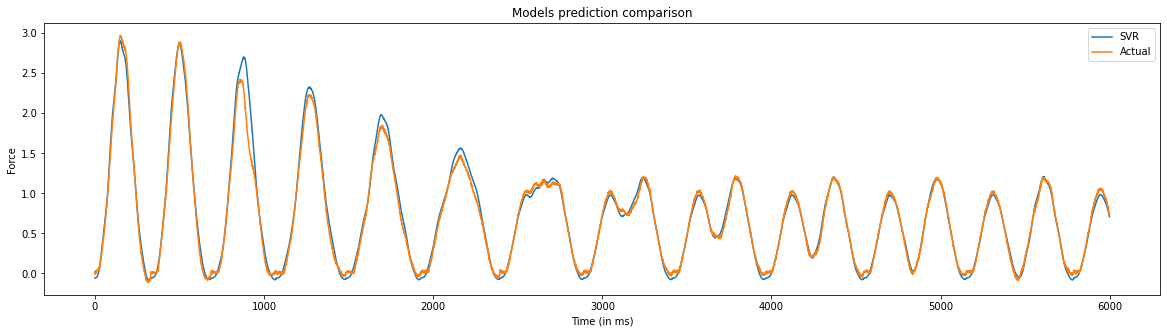

In [13]:
# SVR MODEL
if __name__ == '__main__':
    t1 = datetime.now()
    clf = SVR()
    clf.fit(x_train,y_train)
    t2 = datetime.now()

    print('\n\nTime taken by SVR Model: ',t2-t1)
    y1_pred = clf.predict(x_test)
    y4 = y1_pred
    print('Root mean square error of SVR Model: ',sqrt(mean_squared_error(y_test,y1_pred)))
    
    error7 = []
    for i in range(len(y_test)):
        error7.append(abs(y1_pred[i]-y_test.iloc[i,0]))
    print('Minimum Error =',min(error7))
    print('Maximum Error =',max(error7))
    error8 = sorted(error7)
    print('Median Value of Error =',error8[len(error8)//2])
    
    plt.figure(figsize=(20,5))
    plt.plot(list(range(6000)),y4[:6000], label = 'SVR')
    plt.plot(list(range(6000)),y_test[:6000], label = 'Actual')
    plt.legend()
    plt.xlabel('Time (in ms)')
    plt.ylabel('Force')
    plt.title('Models prediction comparison')
    plt.show()